Candidate: Ivomar Brito Soares

Email: ivomarbsoares@gmail.com

## Summary

<ul>
<li>Importing Libraries</li>
<li>Utility Methods</li>
<li>Reading Dataset</li>
<li>Exploratory Data Analysis</li>
<li>Pre-processing</li>
<li>Creating Training and Test Sets</li>
<li>Training and Testing Classification Models</li>
<li>Steps of Future Work</li>
</ul>

## Importing Libraries

In [1]:
# Allow this notebook to import from its parent path, where commonly used snippets are stored
import sys
sys.path.append('..')

# Automatically reflect code changes to said code snippets
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import the utility code snippet
import dataset

import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_extraction import DictVectorizer

from sklearn                 import metrics
from sklearn.metrics         import confusion_matrix, classification_report

# Models
from sklearn.linear_model             import LogisticRegression
from sklearn.ensemble                 import AdaBoostClassifier
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.ensemble                 import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Utility Methods

In [2]:
def numeric_exploratory_data_analysis(dataset, generate_csv=False):
    """
    Outputs a pandas dataframe with the dtypes, nan and zero value counts of all features. 
    Also outputs a csv file.
    """
    assert isinstance(dataset, pd.core.frame.DataFrame)
    assert isinstance(generate_csv, bool)

     # Shape of the a_dataset.
    print('Shape: {} \n'.format(dataset.shape))

    features = list(dataset)
    numeric_analysis = pd.DataFrame(index=features, columns=['Dtypes',
                                                             '# of values non NaN',
                                                             '# of values NaN',
                                                             '# of values non zero',
                                                             '# of values zero'])

    numeric_analysis['Dtypes']               = dataset.dtypes
    numeric_analysis['# of values non NaN']  = dataset.count()
    numeric_analysis['# of values NaN']      = len(dataset) - dataset.count()
    numeric_analysis['# of values non zero'] = dataset.astype(bool).sum(axis=0)
    numeric_analysis['# of values zero']     = len(dataset) - dataset.astype(bool).sum(axis=0)

    if generate_csv:
        numeric_analysis.to_csv(path_or_buf='numeric_analysis.csv')

    return numeric_analysis

def fit_predict_plot (X_train, X_test, y_train, y_test, model):    
    %time model.fit(X_train, y_train)
    y_test_pred  = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('Accuracy of training set: {}'.format(metrics.accuracy_score(y_train, y_train_pred)))
    print('Accuracy of test set: {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
    plt.figure()
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cnf_matrix, ['Negative', 'Positive'], title='Confusion Matrix')
    plt.show()
    class_report = classification_report(y_test, y_test_pred)
    print(class_report)
    
def plot_confusion_matrix(cm, 
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """    
 
    print('Confusion matrix, without normalization')

    print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## Reading Dataset

In [3]:
# Read the dataset into a Tensorflow dataset (this downloads the dataset the first time, after which it is cached).
ds = dataset.load_dataset()

# We take t50k records as a sample, and turn it to a Pandas data frame.
df = dataset.to_pandas_df(ds, n=50000)

# These columns contain a single feature
scalar_cols = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c7', 'c8']

# These columns contain multiple features (a variable list of IDs)
vector_cols = ['c6', 'c9']

Computing MD5: /home/ivomar/Dropbox/companies_tests/zalando/zms_ds_challenge-v2.0/data/dataset.jsons.gz
MD5 matches: /home/ivomar/Dropbox/companies_tests/zalando/zms_ds_challenge-v2.0/data/dataset.jsons.gz
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
df.head()

,c6,c9,c0,c1,c2,c3,c4,c5,c7,c8,l
0,"[-1841755489, -2043098156, -1727378877, -39779...","[-2054476127, 1283169346]",-1664374510,1292560685,1963151207,-113426919,1024827180,0,781804810,677061876,0
1,"[-574085389, 1869122769, 1747304630]",[-614983515],1566608579,-248982458,336746857,-1629610286,244157766,0,1065163157,332083152,0
2,[],"[-1954958362, 1578060584, -664062100, 10669762...",1935105702,1292560685,-1389162932,-113426919,-8361123,839761088,-1708330775,1856995055,0
3,"[-833071846, 1997866588, -175433000, -32053917...","[-813776566, 1925809914, 173634585, -148212913...",1718276659,630920017,1171414431,-113426919,640993460,-1183679474,680566046,-681791195,1
4,"[-2043098156, -953332297, 1194923608, -2125072...",[980231370],1562430026,630920017,1639152385,1781226914,1493440023,0,324520841,873551722,0


## Exploratory Data Analysis

In [5]:
numeric_exploratory_data_analysis(df)

Shape: (50000, 11) 



,Dtypes,# of values non NaN,# of values NaN,# of values non zero,# of values zero
c6,object,50000,0,42792,7208
c9,object,50000,0,28407,21593
c0,Int64,50000,0,50000,0
c1,Int64,50000,0,50000,0
c2,Int64,50000,0,50000,0
c3,Int64,50000,0,25923,24077
c4,Int64,50000,0,50000,0
c5,Int64,50000,0,32457,17543
c7,Int64,50000,0,50000,0
c8,Int64,50000,0,50000,0


<ul>

<li>The dataset presents no missing values (nan).</li>
<li>Several features c6, c9, c3 and c5 have lots of zero values. When the data was read using tensorflow, it was used default = 0.</li>
<li>The target variable l has 41095 values 0 (82%) and 8905 values 1 (18%), so there is some imbalance in the target variable.</li>
    
</ul>

Some columns have high cardinality (number of unique values):

In [6]:
for column in scalar_cols:
    print('column = %s, cardinality = %s' % (column, df[column].nunique()))

column = c0, cardinality = 1411
column = c1, cardinality = 70
column = c2, cardinality = 254
column = c3, cardinality = 47
column = c4, cardinality = 4842
column = c5, cardinality = 3
column = c7, cardinality = 14267
column = c8, cardinality = 23246


In [7]:
for column in vector_cols:
    print('column = %s, cardinality = %s' % (column, len(set(df[column].sum()))))

column = c6, cardinality = 198642
column = c9, cardinality = 60060


## Pre-processing

In [8]:
# Labels (target variable)
y = df['l']
y = y.astype('int')

In [9]:
# One hot encode all features available
raw_x = list()
for _i, row in df.iterrows():
    record = list()
    for c in scalar_cols:
        # We name space the feature with the column name so that we can easily see from which column it came from
        record.append('%s^%s' % (c, row[c]))
    for c in vector_cols:
        # Same for c6 and c9
        record.extend(['%s^%s' % (c, x) for x in row[c]])
    # We do not consider the counts of the feature appearing (only whether they are present or not)
    raw_x.append({k: 1 for k in record})



In [10]:
# Vectorize the features
vectorizer = DictVectorizer()
X = vectorizer.fit_transform(raw_x)

## Creating Training and Test Sets

In [11]:
# The data is chronologically ordered with older data first 
# 80% training set, 20% testing set
X_train, X_test = X[:40000], X[40000:]
y_train, y_test = y[:40000], y[40000:]

for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(40000, 302842)
(10000, 302842)
(40000,)
(10000,)


## Training and Testing Classification Models

------------------------------------------------------------------------------
LogisticRegression
------------------------------------------------------------------------------
CPU times: user 23.7 s, sys: 13.2 s, total: 36.9 s
Wall time: 9.9 s
Accuracy of training set: 0.961275
Accuracy of test set: 0.8445
Confusion matrix, without normalization
[[7764  402]
 [1153  681]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<Figure size 432x288 with 0 Axes>

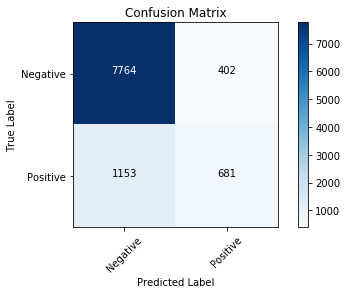

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8166
           1       0.63      0.37      0.47      1834

    accuracy                           0.84     10000
   macro avg       0.75      0.66      0.69     10000
weighted avg       0.83      0.84      0.83     10000

------------------------------------------------------------------------------
DecisionTreeClassifier
------------------------------------------------------------------------------
CPU times: user 2min 2s, sys: 0 ns, total: 2min 2s
Wall time: 2min 2s
Accuracy of training set: 0.997575
Accuracy of test set: 0.8212
Confusion matrix, without normalization
[[7437  729]
 [1059  775]]


<Figure size 432x288 with 0 Axes>

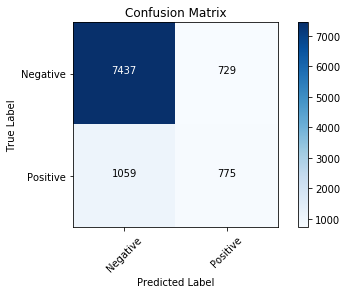

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8166
           1       0.52      0.42      0.46      1834

    accuracy                           0.82     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.81      0.82      0.81     10000

------------------------------------------------------------------------------
RandomForestClassifier
------------------------------------------------------------------------------
CPU times: user 29min 41s, sys: 1.05 s, total: 29min 42s
Wall time: 29min 45s
Accuracy of training set: 0.9975
Accuracy of test set: 0.8522
Confusion matrix, without normalization
[[7937  229]
 [1249  585]]


<Figure size 432x288 with 0 Axes>

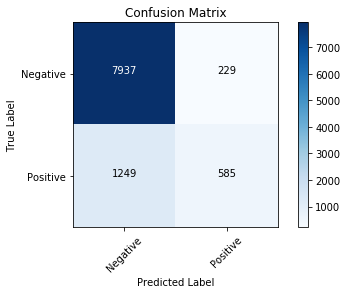

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8166
           1       0.72      0.32      0.44      1834

    accuracy                           0.85     10000
   macro avg       0.79      0.65      0.68     10000
weighted avg       0.84      0.85      0.83     10000

------------------------------------------------------------------------------
AdaBoostClassifier
------------------------------------------------------------------------------
CPU times: user 8min 24s, sys: 183 ms, total: 8min 24s
Wall time: 8min 24s
Accuracy of training set: 0.849
Accuracy of test set: 0.8466
Confusion matrix, without normalization
[[7948  218]
 [1316  518]]


<Figure size 432x288 with 0 Axes>

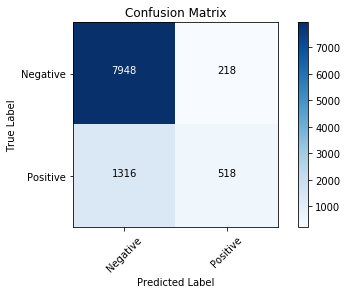

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8166
           1       0.70      0.28      0.40      1834

    accuracy                           0.85     10000
   macro avg       0.78      0.63      0.66     10000
weighted avg       0.83      0.85      0.82     10000



In [12]:
models = []

models.append(('LogisticRegression',            LogisticRegression()))
models.append(('DecisionTreeClassifier',        DecisionTreeClassifier()))
models.append(('RandomForestClassifier',        RandomForestClassifier()))
models.append(('AdaBoostClassifier',            AdaBoostClassifier()))

for name, model in models:
    print('------------------------------------------------------------------------------')
    print(name)
    print('------------------------------------------------------------------------------')
    fit_predict_plot(X_train, X_test, y_train, y_test, model)

<ul>
<li>The classifiers LogisticRegression, DecisionTreeClassifier, RandomForestClassifier are overfitting, the accuracy on the training set is higher than on the test set.</li>    
<li>The confusion matrices shows several misclassified examples, principally on the positive class. This can be verified by the lower f1 score of the positive class.</li>
</ul>

## Steps of Future Work

<ul>
<li>Discuss strategies to imput missing values (zero and empty lists). The dataset has lots of value zero and this might influence the final results of the classifiers.</li>    
<li>Train other classifiers and evaluate their output.</li>
<li>Perform hyper parameter tunning (GridSearchCV) on the best performing classifiers to see if some improvement can be obtained.</li>
<li>Use strategies to combat the overfitting of the classifiers (e.g. regularization).
</ul>